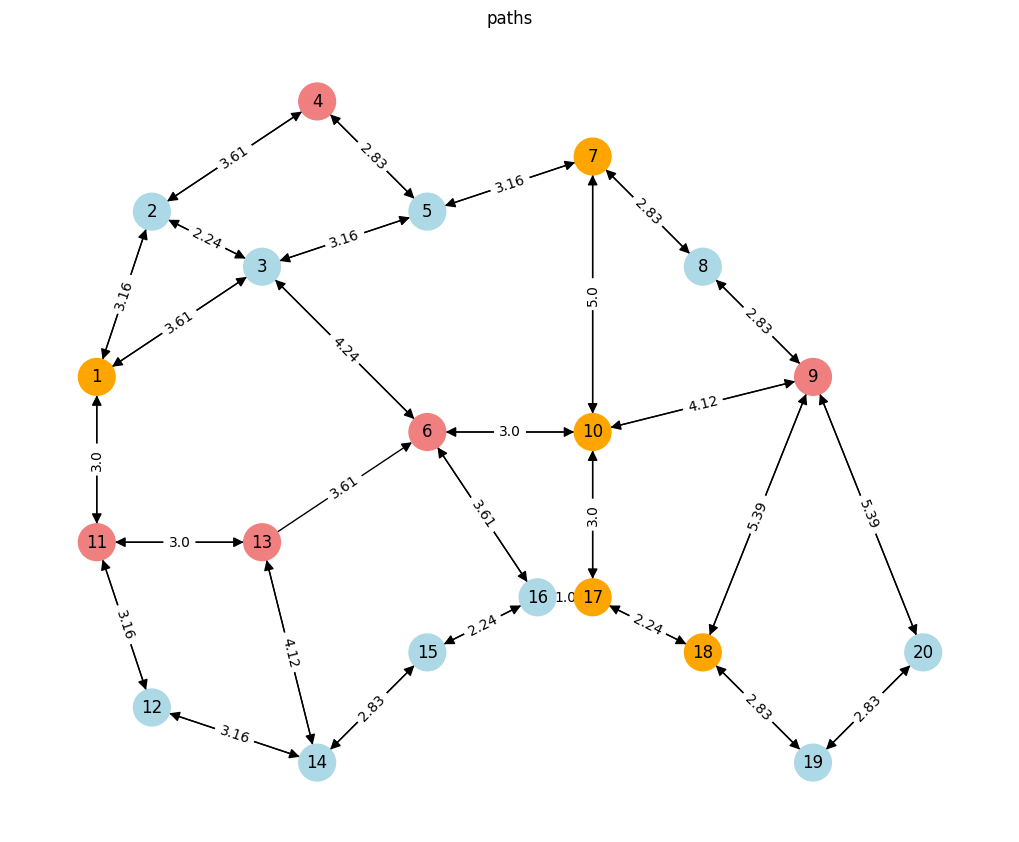

In [7]:
positions = {1: (2, 10),
 2: (3, 13),
 3: (5, 12),
 4: (6, 15),
 5: (8, 13),
 6: (8, 9),
 7: (11, 14),
 8: (13, 12),
 9: (15, 10),
 10: (11, 9),
 11: (2, 7),
 12: (3, 4),
 13: (5, 7),
 14: (6, 3),
 15: (8, 5),
 16: (10, 6),
 17: (11, 6),
 18: (13, 5),
 19: (15, 3),
 20: (17, 5)}


connections = [(1, 2),
 (1, 3),
 (1, 11),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 5),
 (3, 6),
 (4, 2),
 (4, 5),
 (5, 3),
 (5, 4),
 (5, 7),
 (6, 3),
 (6, 10),
 (6, 16),
 (7, 5),
 (7, 8),
 (7, 10),
 (8, 7),
 (8, 9),
 (9, 8),
 (9, 10),
 (9, 18),
 (9, 20),
 (10, 6),
 (10, 7),
 (10, 9),
 (10, 17),
 (11, 1),
 (11, 12),
 (11, 13),
 (12, 11),
 (12, 14),
 (13, 6),
 (13, 11),
 (13, 14),
 (14, 12),
 (14, 13),
 (14, 15),
 (15, 14),
 (15, 16),
 (16, 6),
 (16, 15),
 (16, 17),
 (17, 10),
 (17, 16),
 (17, 18),
 (18, 9),
 (18, 17),
 (18, 19),
 (19, 18),
 (19, 20),
 (20, 9),
 (20, 19)]

edges = {(1, 2): 3.16,
 (1, 3): 3.61,
 (1, 11): 3.0,
 (2, 1): 3.16,
 (2, 3): 2.24,
 (2, 4): 3.61,
 (3, 1): 3.61,
 (3, 2): 2.24,
 (3, 5): 3.16,
 (3, 6): 4.24,
 (4, 2): 3.61,
 (4, 5): 2.83,
 (5, 3): 3.16,
 (5, 4): 2.83,
 (5, 7): 3.16,
 (6, 3): 4.24,
 (6, 10): 3.0,
 (6, 16): 3.61,
 (7, 5): 3.16,
 (7, 8): 2.83,
 (7, 10): 5.0,
 (8, 7): 2.83,
 (8, 9): 2.83,
 (9, 8): 2.83,
 (9, 10): 4.12,
 (9, 18): 5.39,
 (9, 20): 5.39,
 (10, 6): 3.0,
 (10, 7): 5.0,
 (10, 9): 4.12,
 (10, 17): 3.0,
 (11, 1): 3.0,
 (11, 12): 3.16,
 (11, 13): 3.0,
 (12, 11): 3.16,
 (12, 14): 3.16,
 (13, 6): 3.61,
 (13, 11): 3.0,
 (13, 14): 4.12,
 (14, 12): 3.16,
 (14, 13): 4.12,
 (14, 15): 2.83,
 (15, 14): 2.83,
 (15, 16): 2.24,
 (16, 6): 3.61,
 (16, 15): 2.24,
 (16, 17): 1.0,
 (17, 10): 3.0,
 (17, 16): 1.0,
 (17, 18): 2.24,
 (18, 9): 5.39,
 (18, 17): 2.24,
 (18, 19): 2.83,
 (19, 18): 2.83,
 (19, 20): 2.83,
 (20, 9): 5.39,
 (20, 19): 2.83}

In [8]:
from pyomo.environ import *

# Define a model
model = ConcreteModel()

model.source = 1
model.destination = 16

model.nodes = Set(initialize=list(positions.keys())) 
model.arcs = Set(within=model.nodes*model.nodes, initialize=connections)
model.cost = Param(model.arcs, initialize=edges)


# Define the decision variable: whether to take an edge or not
model.x = Var(model.arcs, domain=NonNegativeReals)

def obj_rule(model):
    return sum(model.cost[i, j] * model.x[i, j] for (i, j) in model.arcs)
model.obj = Objective(rule=obj_rule, sense=minimize)



#def net_demand_rule(model,node):
#    return sum(model.x[k,node] for k in model.nodes if (k,i) in model.arcs)-sum(model.x[node,j] for j in model.nodes if (node,j) in model.Arcs)



def flow_conservation_rule(model, node):
    if node == model.source:  # Source node
        return ((sum(model.x[i, node] for i in model.nodes if (i, node) in model.arcs) + sum(model.x[node, j] for j in model.nodes if (node, j) in model.arcs)) == 1)
    elif model.destination:  # Destination node
        return ((sum(model.x[i, node] for i in model.nodes if (i, node) in model.arcs) + sum(model.x[node, j] for j in model.nodes if (node, j) in model.arcs)) == 1)
    else:
        return ((sum(model.x[i, node] for i in model.nodes if (i, node) in model.arcs) == sum(model.x[node, j] for j in model.nodes if (node, j) in model.arcs)))
model.flow_conservation = Constraint(model.nodes, rule=flow_conservation_rule)

# Solve the model
solver = SolverFactory('glpk')
solver.solve(model)


print("Variables with value equal to 1:")
for (i, j) in model.arcs:
    if model.x[i, j].value != 0:
        print(f"x[{i},{j}] = {model.x[i, j].value}")


Variables with value equal to 1:
x[2,3] = 1.0
x[5,4] = 1.0
x[7,8] = 1.0
x[9,10] = 1.0
x[11,1] = 1.0
x[13,6] = 1.0
x[14,12] = 1.0
x[16,15] = 1.0
x[18,17] = 1.0
x[20,19] = 1.0
